Apply Data Cleaning to the Datasets and then apply Kmeans algorithm for find pattern and the best value of.the K for the following features.

1. Use feautes fixed acidity and volatile acidity
2. Use feautes Cirtic acidity and fixed acidity
3. Use feautes residual suger and sulphades
4. Use feautes free.sulfur.dioxide and total.sulfur.dioxide
5. Use feautes fixed acidity, citric acidity and volatile acidity
5. Use feautes density and pH


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df_w=pd.read_csv('winequality-red.csv')
df_w.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
df_w.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
df_w.shape

(1599, 12)

In [5]:
df_w.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df_w.skew()

fixed_acidity           0.982751
volatile_acidity        0.671593
citric_acid             0.318337
residual_sugar          4.540655
chlorides               5.680347
free_sulfur_dioxide     1.250567
total_sulfur_dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [7]:
import seaborn as sns

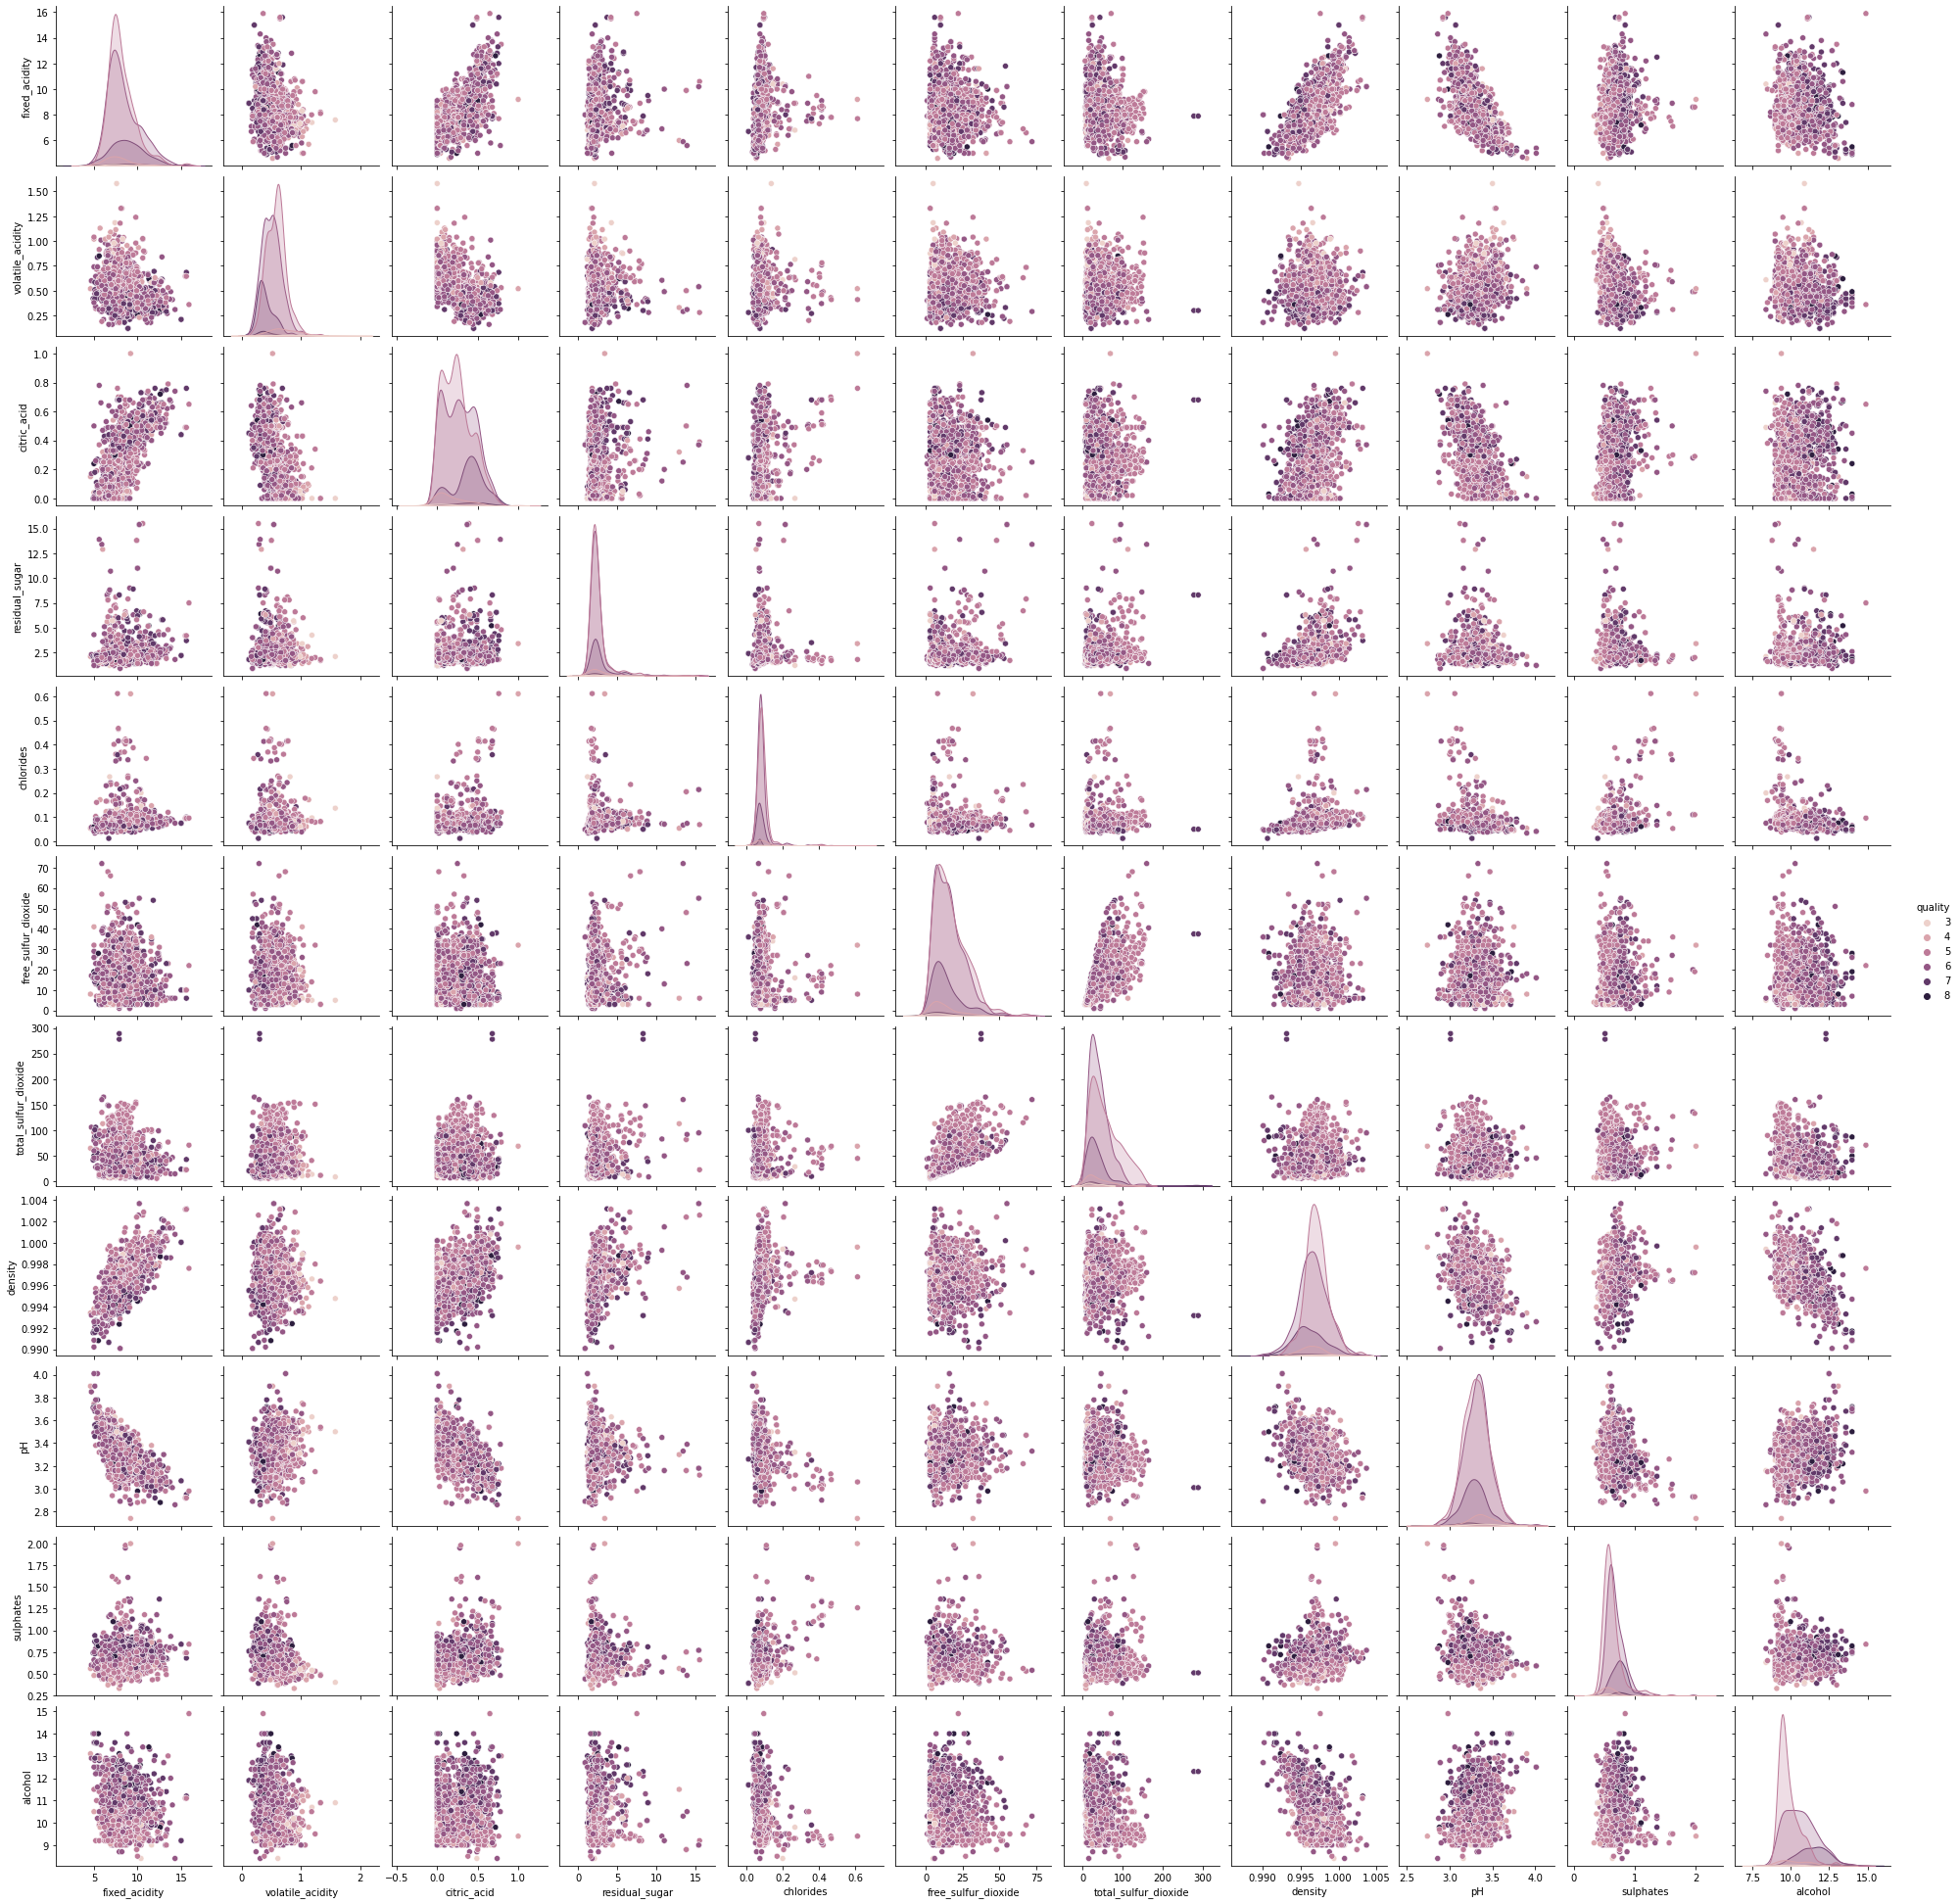

In [8]:
sns.pairplot(df_w,hue='quality')

<AxesSubplot:>

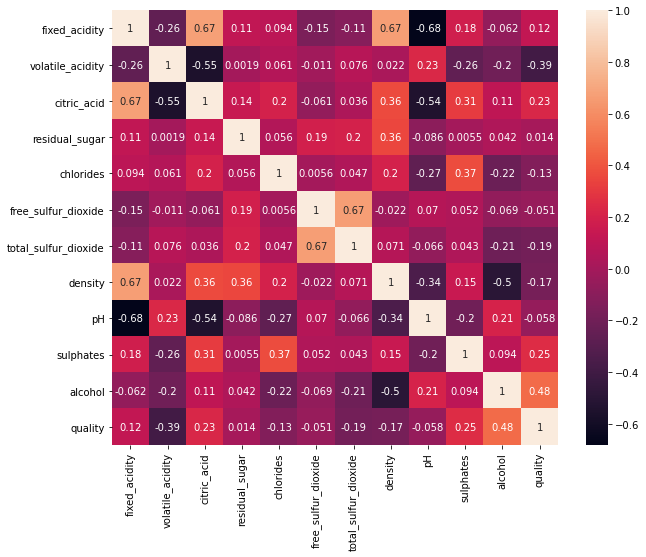

In [9]:
#multicolinearity


plt.figure(figsize=(10,8))

sns.heatmap(df_w.corr(),annot=True)

In [15]:
#free_sulfer_dioxide,#total_sulfer_dioxide
#fixed_oxidity

In [14]:
x=df_w.drop('quality',axis=1)
y=df_w.quality

# K-means

scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_scale=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [16]:
num= range(1,15)
error=[]
for i in num:
    cluster= KMeans(n_clusters=i)
    cluster.fit(df_scale)
    centroids= cluster.cluster_centers_
    error.append(cluster.inertia_)
info= pd.DataFrame({'Numberof cluster':num,'Error':error})
info

Numberof cluster         Error
0                  1  17589.000000
1                  2  14330.144113
2                  3  12629.974592
3                  4  11294.286755
4                  5  10155.402219
5                  6   9361.961753
6                  7   8644.811467
7                  8   8301.176262
8                  9   7970.682710
9                 10   7697.982359
10                11   7442.179033
11                12   7262.633009
12                13   7047.929068
13                14   6815.167431

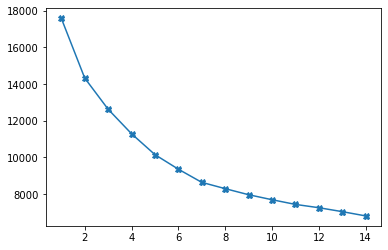

In [17]:
plt.plot(info['Numberof cluster'], info.Error, marker='X')

In [18]:
# optimal K 2 or 7

In [19]:
from sklearn.metrics import silhouette_score
c=[2,3,4,5,6,7,8]


for j in c:
    cluster= KMeans(n_clusters=j)
    label=cluster.fit_predict(df_scale)
    score=silhouette_score(df_scale,label,random_state=10)
    print('the score of ',i,'is',score)


the score of  14 is 0.2139417458778928
the score of  14 is 0.18920406811068666
the score of  14 is 0.205378435934257
the score of  14 is 0.19026993359227543
the score of  14 is 0.19414342535903673
the score of  14 is 0.1901832143851427
the score of  14 is 0.15098910000278734


In [20]:
#highest score k=2

In [21]:
cluster=KMeans(n_clusters=2)
label_K=cluster.fit_predict(df_scale)
label_K

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
df_k=pd.DataFrame(df_scale, columns=df_scale.columns)
df_k['label_kmeans']=label_K

In [23]:
df_k.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  label_kmeans  
0 -0.960246             0  
1 -0.584777             0  
2 -0.584777             0  
3 -0.584777             1  
4 -0.960246             0

In [24]:
df_k.label_kmeans.value_counts()

0    961
1    638
Name: label_kmeans, dtype: int64

In [25]:
df_w.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

1. Use feautes fixed acidity and volatile acidity

In [26]:
x1 = df_scale[['fixed_acidity','volatile_acidity']]

In [27]:
err = []
for i in range(1,15):
    model = KMeans(n_clusters=i)
    model.fit(x1)
    centroids=model.cluster_centers_
    err.append(model.inertia_)

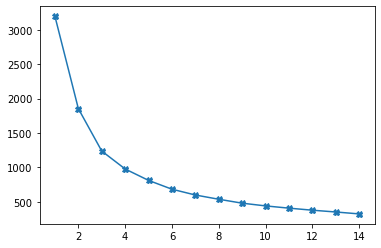

In [28]:
plt.plot(range(1,15),err,marker='X')
plt.show()

In [29]:
#so lets try with 3 clusters

In [30]:
for clusters in range(2,8):
    model  = KMeans(clusters)
    model.fit(x1)
    sil_score = silhouette_score(x1,model.labels_)
    print('silhouette_score for', clusters,'clusters:',sil_score)

silhouette_score for 2 clusters: 0.40268711179988836
silhouette_score for 3 clusters: 0.3750651141393108
silhouette_score for 4 clusters: 0.3581257448732569
silhouette_score for 5 clusters: 0.3625200781891886
silhouette_score for 6 clusters: 0.34800781758583954
silhouette_score for 7 clusters: 0.33513126121206466


In [31]:
#highest score for k = 2
#Lets consider K = 2, for builing Kmeans 

In [32]:
cluster = KMeans(n_clusters=2)
label_x1 = cluster.fit_predict(x1)
label_x1

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
x1['Labels'] = label_x1

In [34]:
x1.head()

fixed_acidity  volatile_acidity  Labels
0      -0.528360          0.961877       1
1      -0.298547          1.967442       1
2      -0.298547          1.297065       1
3       1.654856         -1.384443       0
4      -0.528360          0.961877       1

In [35]:
x1.Labels.value_counts()

1    1000
0     599
Name: Labels, dtype: int64

2. Use feautes Cirtic acidity and fixed acidity

In [36]:
x2 = df_scale[['citric_acid','fixed_acidity']]

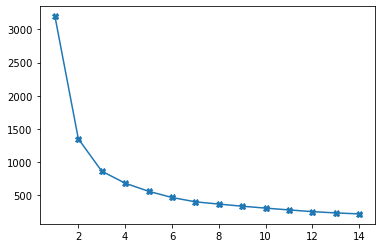

In [37]:
err = []
for i in range(1,15):
    model = KMeans(n_clusters=i)
    model.fit(x2)
    centroids=model.cluster_centers_
    err.append(model.inertia_)
plt.plot(range(1,15),err,marker='X')
plt.show()

In [38]:
for clusters in range(2,8):
    model  = KMeans(clusters)
    model.fit(x2)
    sil_score = silhouette_score(x2,model.labels_)
    print('silhouette_score for', clusters,'clusters:',sil_score)

silhouette_score for 2 clusters: 0.49828382212526556
silhouette_score for 3 clusters: 0.432101931855055
silhouette_score for 4 clusters: 0.39082861367057403
silhouette_score for 5 clusters: 0.39030388262584537
silhouette_score for 6 clusters: 0.3914087058536305
silhouette_score for 7 clusters: 0.36022428695284375


In [39]:
#highest score for k = 2
#Lets consider K = 2, for builing Kmeans

In [41]:
cluster = KMeans(n_clusters=2)
label_x2 = cluster.fit_predict(x2)
label_x2

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
x2['Labels'] = label_x2
x2.head()

citric_acid  fixed_acidity  Labels
0    -1.391472      -0.528360       0
1    -1.391472      -0.298547       0
2    -1.186070      -0.298547       0
3     1.484154       1.654856       1
4    -1.391472      -0.528360       0

3. Use feautes residual suger and sulphades

In [43]:
x3 = df_scale[['residual_sugar','sulphates']]

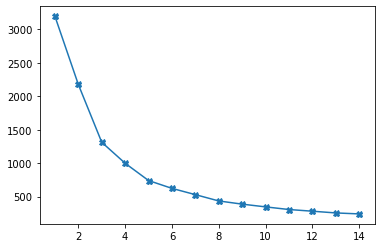

In [44]:
err = []
for i in range(1,15):
    model = KMeans(n_clusters=i)
    model.fit(x3)
    centroids=model.cluster_centers_
    err.append(model.inertia_)
plt.plot(range(1,15),err,marker='X')
plt.show()

In [45]:
for clusters in range(2,8):
    model  = KMeans(clusters)
    model.fit(x3)
    sil_score = silhouette_score(x3,model.labels_)
    print('silhouette_score for', clusters,'clusters:',sil_score)
#highest score for k = 2
#Lets consider K = 2, for builing Kmeans 

silhouette_score for 2 clusters: 0.6650121943532973
silhouette_score for 3 clusters: 0.5208666174912692
silhouette_score for 4 clusters: 0.4583241228631912
silhouette_score for 5 clusters: 0.47446195900593274
silhouette_score for 6 clusters: 0.3555791405894948
silhouette_score for 7 clusters: 0.3550583017822985


In [46]:
cluster = KMeans(n_clusters=2)
label_x3 = cluster.fit_predict(x3)
label_x3

array([1, 1, 1, ..., 1, 1, 1])

In [47]:
x3['Labels'] = label_x3
x3.head()

residual_sugar  sulphates  Labels
0       -0.453218  -0.579207       1
1        0.043416   0.128950       1
2       -0.169427  -0.048089       1
3       -0.453218  -0.461180       1
4       -0.453218  -0.579207       1

4. Use feautes free.sulfur.dioxide and total.sulfur.dioxide

In [49]:
x4 = df_scale[['free_sulfur_dioxide','total_sulfur_dioxide']]

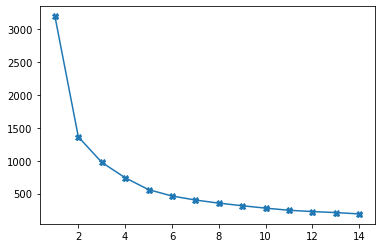

In [50]:
err = []
for i in range(1,15):
    model = KMeans(n_clusters=i)
    model.fit(x4)
    centroids=model.cluster_centers_
    err.append(model.inertia_)
plt.plot(range(1,15),err,marker='X')
plt.show()

In [51]:
for clusters in range(2,8):
    model  = KMeans(clusters)
    model.fit(x4)
    sil_score = silhouette_score(x4,model.labels_)
    print('silhouette_score for', clusters,'clusters:',sil_score)
#highest score for k = 2
#Lets consider K = 2, for builing Kmeans 

silhouette_score for 2 clusters: 0.5427295634027048
silhouette_score for 3 clusters: 0.459119383204162
silhouette_score for 4 clusters: 0.45342803056417913
silhouette_score for 5 clusters: 0.45253064366021456
silhouette_score for 6 clusters: 0.45526795346793153
silhouette_score for 7 clusters: 0.4427444558062324


In [52]:
cluster = KMeans(n_clusters=2)
label_x4 = cluster.fit_predict(x4)
label_x4

array([1, 0, 1, ..., 0, 0, 1])

In [53]:
x4['Labels'] = label_x4
x4.head()

free_sulfur_dioxide  total_sulfur_dioxide  Labels
0            -0.466193             -0.379133       1
1             0.872638              0.624363       0
2            -0.083669              0.229047       1
3             0.107592              0.411500       0
4            -0.466193             -0.379133       1

5. Use feautes fixed acidity, citric acidity and volatile acidity

In [54]:
x5 = df_scale[['fixed_acidity','citric_acid','volatile_acidity']]

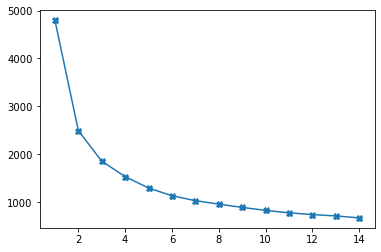

In [55]:
err = []
for i in range(1,15):
    model = KMeans(n_clusters=i)
    model.fit(x5)
    centroids=model.cluster_centers_
    err.append(model.inertia_)
plt.plot(range(1,15),err,marker='X')
plt.show()

In [56]:
for clusters in range(2,8):
    model  = KMeans(clusters)
    model.fit(x5)
    sil_score = silhouette_score(x5,model.labels_)
    print('silhouette_score for', clusters,'clusters:',sil_score)
#highest score for k = 2
#Lets consider K = 2, for builing Kmeans 

silhouette_score for 2 clusters: 0.4200374011587477
silhouette_score for 3 clusters: 0.3515603858186229
silhouette_score for 4 clusters: 0.30759035127112283
silhouette_score for 5 clusters: 0.3208419264507072
silhouette_score for 6 clusters: 0.3096274652854545
silhouette_score for 7 clusters: 0.2906911755011925


In [57]:
cluster = KMeans(n_clusters=2)
label_x5 = cluster.fit_predict(x5)
label_x5

array([1, 1, 1, ..., 1, 1, 0])

In [58]:
x5['Labels'] = label_x5
x5.head()

fixed_acidity  citric_acid  volatile_acidity  Labels
0      -0.528360    -1.391472          0.961877       1
1      -0.298547    -1.391472          1.967442       1
2      -0.298547    -1.186070          1.297065       1
3       1.654856     1.484154         -1.384443       0
4      -0.528360    -1.391472          0.961877       1

6. Use feautes density and pH

In [59]:
x6 = df_scale[['density','pH']]

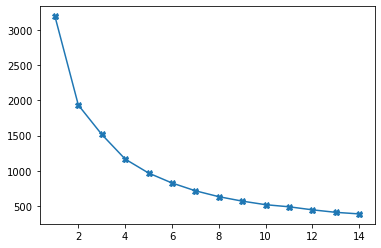

In [60]:
err = []
for i in range(1,15):
    model = KMeans(n_clusters=i)
    model.fit(x6)
    centroids=model.cluster_centers_
    err.append(model.inertia_)
plt.plot(range(1,15),err,marker='X')
plt.show()

In [61]:
for clusters in range(2,8):
    model  = KMeans(clusters)
    model.fit(x6)
    sil_score = silhouette_score(x6,model.labels_)
    print('silhouette_score for', clusters,'clusters:',sil_score)
#highest score for k = 2
#Lets consider K = 2, for builing Kmeans 

silhouette_score for 2 clusters: 0.3523172110329148
silhouette_score for 3 clusters: 0.2970218559134116
silhouette_score for 4 clusters: 0.3202403280468185
silhouette_score for 5 clusters: 0.3269703486302198
silhouette_score for 6 clusters: 0.3274441223455765
silhouette_score for 7 clusters: 0.33992047827010186


In [62]:
cluster = KMeans(n_clusters=2)
label_x6 = cluster.fit_predict(x6)
label_x6

array([0, 1, 1, ..., 0, 0, 0])

In [63]:
x6['Labels'] = label_x6
x6.head()

density        pH  Labels
0  0.558274  1.288643       0
1  0.028261 -0.719933       1
2  0.134264 -0.331177       1
3  0.664277 -0.979104       1
4  0.558274  1.288643       0

In [64]:
#Inference : based on overall features we got 2 as our best features and 
#even in consideration of individual features we got same 2 as our best K value

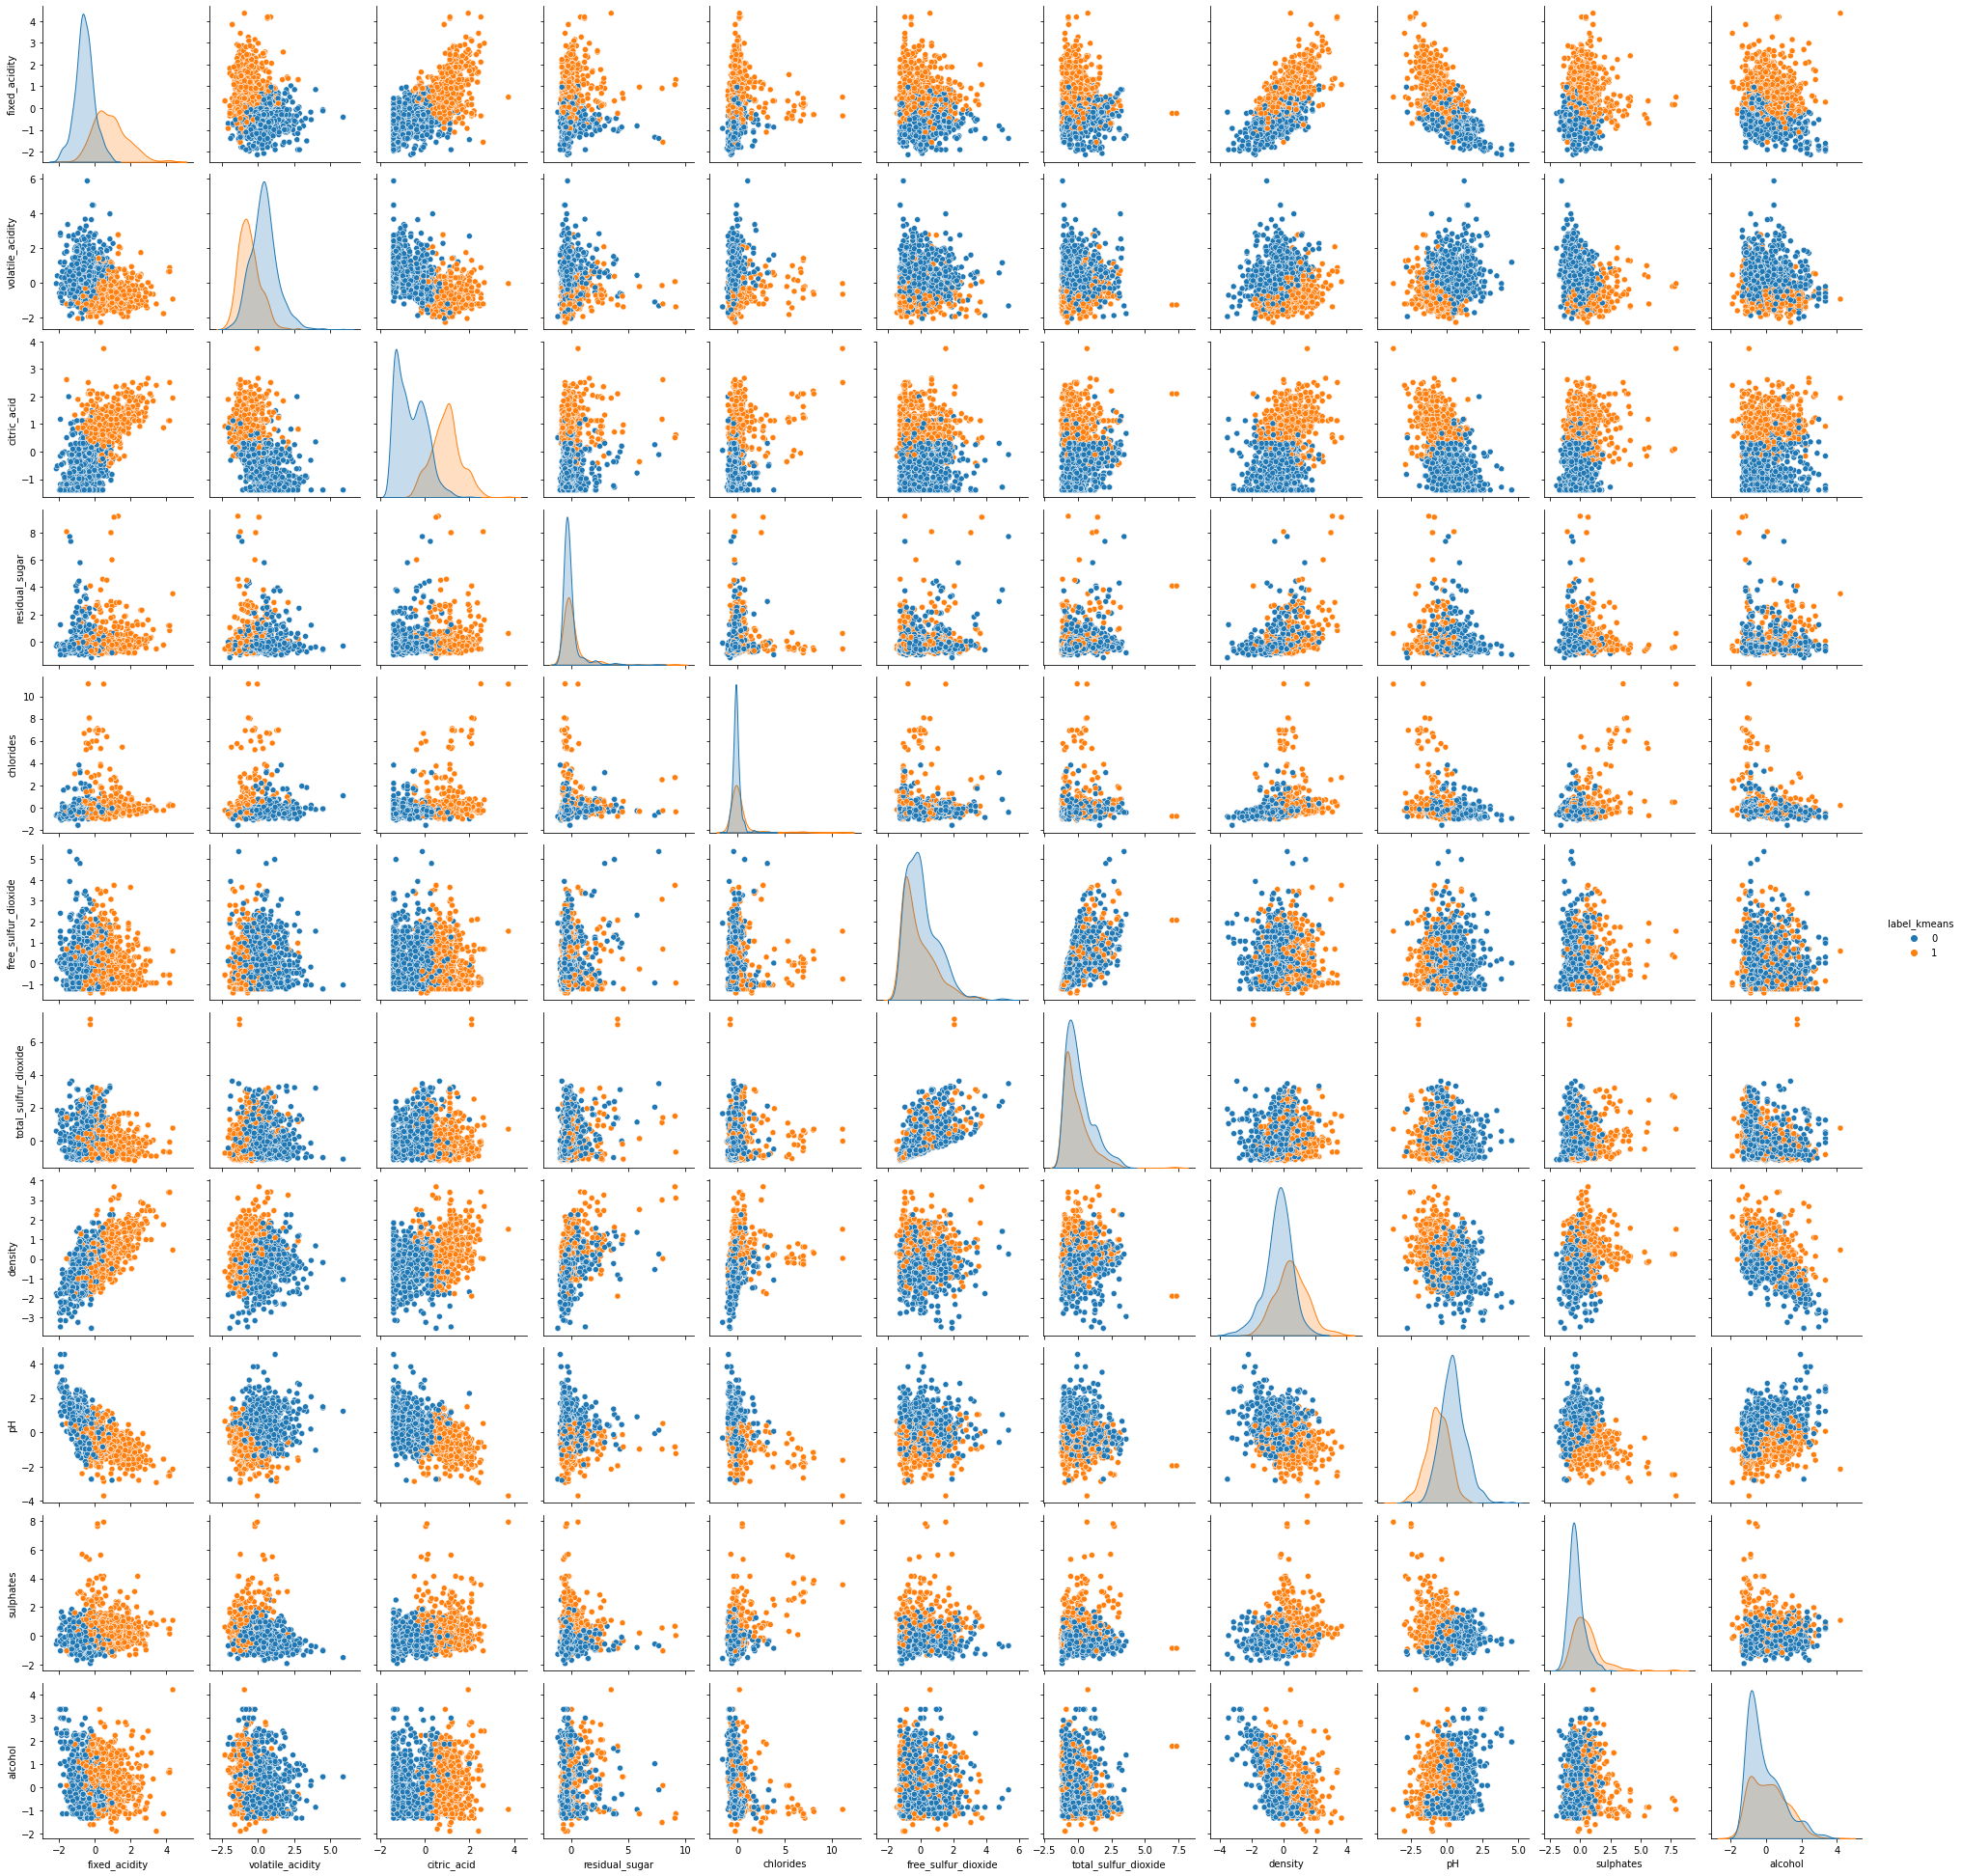

In [71]:
sns.pairplot(df_scale,hue='label_kmeans')
plt.show()

<AxesSubplot:xlabel='alcohol', ylabel='density'>

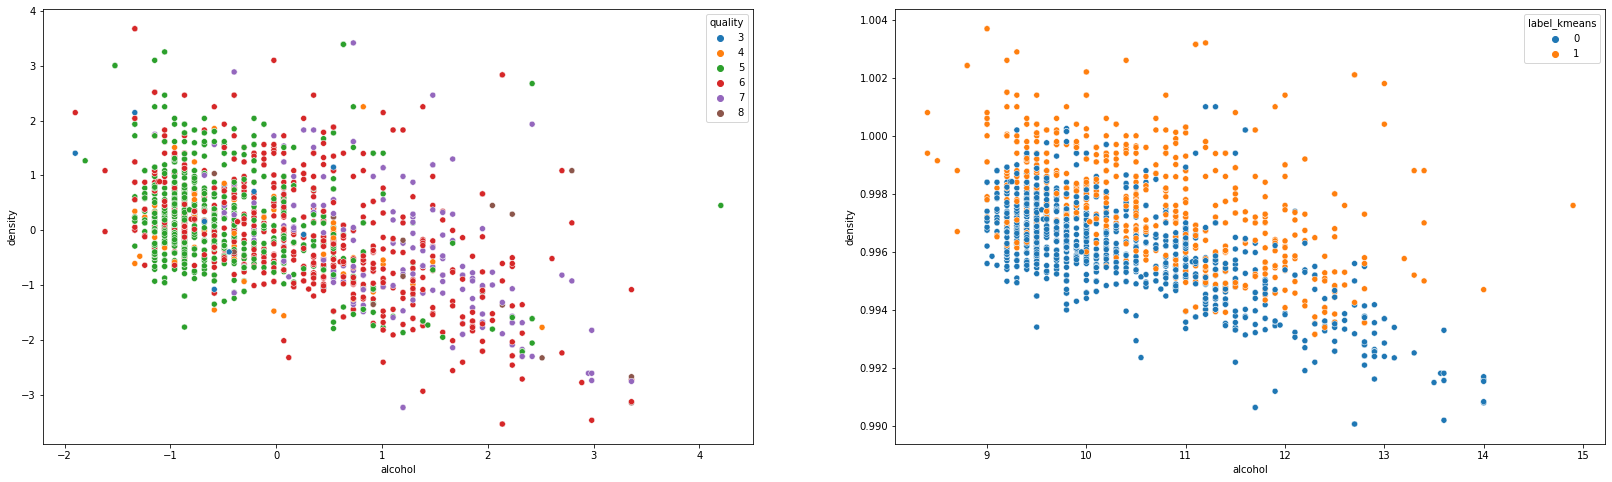

In [76]:
plt.figure(figsize=(28,8))
plt.subplot(1,2,1)
sns.scatterplot(x=df_scale.alcohol, y= df_scale.density, data=df_scale, hue=df_w.quality, palette='tab10')
plt.subplot(1,2,2)
sns.scatterplot(x=df_w.alcohol, y= df_w.density, data=df_w, hue=df_scale.label_kmeans, palette='tab10')
